Summary Table for GENDER:
Columns 'Alive' or 'Deceased' not found in grouped data for GENDER_mapped.
VITALSTATUS_mapped       A       D  D3   D4   D5  X  X2  X4    X5   Total
GENDER_mapped                                                            
Female              642918  296949   7  120  443  2  17  46  1563  942065
Male                589319  338097   5  109  497  1  28  38  1444  929538
Unknown                  0       2   0    0    0  0   0   0     0       2


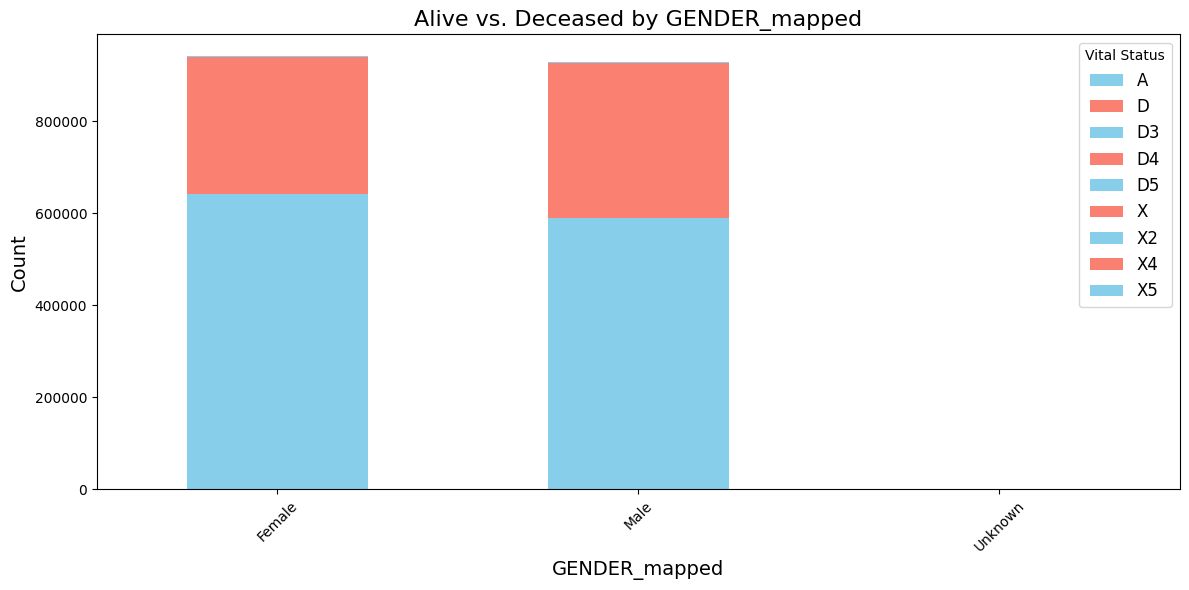

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Function to load and process patient data in chunks
def load_patient_data(file_path, chunk_size=100000):
    """
    Load the patient data in chunks and process relevant columns.
    """
    chunks = []
    for chunk in pd.read_csv(
        file_path, 
        usecols=['VITALSTATUS', 'GENDER', 'PATIENTID'],  # Load relevant columns
        dtype={'GENDER': 'int8', 'VITALSTATUS': 'str'},  # Optimize data types
        chunksize=chunk_size,
        low_memory=True
    ):
        chunks.append(chunk.dropna(subset=['VITALSTATUS']))  # Drop rows with missing VITALSTATUS

    return pd.concat(chunks, ignore_index=True)

# File path
patient_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv"

# Load the patient dataset
patient_df = load_patient_data(patient_file_path)

# Map gender and vital status for better readability
gender_mapping = {1: 'Male', 2: 'Female', 9: 'Unknown'}
vitalstatus_mapping = {'1': 'Alive', '0': 'Deceased'}  # Assuming 1=Alive, 0=Deceased
patient_df['GENDER_mapped'] = patient_df['GENDER'].map(gender_mapping)
patient_df['VITALSTATUS_mapped'] = patient_df['VITALSTATUS'].replace(vitalstatus_mapping)

# Define function for generating table
def generate_table(demographic_field):
    """
    Generates a summary table of alive vs. deceased counts for each subgroup.
    """
    table = patient_df.groupby([demographic_field, 'VITALSTATUS_mapped']).size().unstack(fill_value=0)
    table['Total'] = table.sum(axis=1)
    if 'Alive' in table.columns and 'Deceased' in table.columns:
        table['Alive (%)'] = (table['Alive'] / table['Total']) * 100
        table['Deceased (%)'] = (table['Deceased'] / table['Total']) * 100
    else:
        print(f"Columns 'Alive' or 'Deceased' not found in grouped data for {demographic_field}.")
    return table

# Define function for plotting stacked bar chart
def plot_stacked_bar(demographic_field):
    """
    Plots a stacked bar chart comparing alive vs. deceased for each demographic group.
    """
    # Group data by the selected demographic field and VITALSTATUS
    grouped_data = patient_df.groupby([demographic_field, 'VITALSTATUS_mapped']).size().unstack(fill_value=0)

    # Plot stacked bar chart
    grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
    plt.title(f"Alive vs. Deceased by {demographic_field}", fontsize=16)
    plt.xlabel(demographic_field, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Vital Status", fontsize=12)
    plt.tight_layout()
    plt.show()

# Generate and display the chart and table for GENDER
print("Summary Table for GENDER:")
gender_table = generate_table('GENDER_mapped')
print(gender_table)
plot_stacked_bar('GENDER_mapped')
